In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [8]:
class AgentState(TypedDict):
    name: str
    age: int
    skills: str
    result: str

In [9]:
def first_node(state: AgentState) -> AgentState:
    """First node to add the name to result"""

    state['result'] = f"Hi {state['name']}, welcome to the system!, "

    return state

def second_node(state: AgentState) -> AgentState:
    """Second node to add the age to result"""

    state['result'] = state['result'] + f"You are {state['age']} years old! \n"

    return state

def thrid_node(state: AgentState) -> AgentState:
    """Thrid node to add the skills to the result"""

    state['result'] = state['result'] + f"You have skills in: {state['skills']}"

    return state

In [10]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("thrid_node", thrid_node)

graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "thrid_node")

graph.set_entry_point("first_node")
graph.set_finish_point("thrid_node")

app = graph.compile()

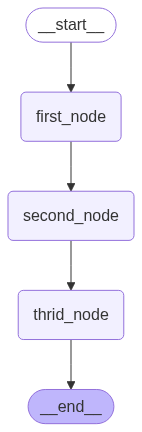

In [12]:
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({ 'name': "DJ", "age": 30, "skills": "Node, Python, AI-Agents"})
print(result["result"])

Hi DJ, welcome to the system!, You are 30 years old! 
You have skills in: Node, Python, AI-Agents
